In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['marketdata_sample.csv', 'news_sample.csv']


In [38]:
from kaggle.competitions import twosigmanews
# You can only call make_env() once, so don't lose it!
env = twosigmanews.make_env()
(market_train_df, news_train_df) = env.get_training_data()

Exception: You can only make one environment for this competition.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
mkt = market_train_df
news = news_train_df

In [41]:
mkt.tail()

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
4072951,2016-12-30 22:00:00+00:00,ZIOP.O,ZIOPHARM Oncology Inc,1608829.0,5.35,5.37,-0.003724,0.000000,0.000536,-0.001868,-0.165367,-0.138042,-0.139597,-0.135913,0.051189,0.0
4072952,2016-12-30 22:00:00+00:00,ZLTQ.O,ZELTIQ Aesthetics Inc,347830.0,43.52,43.62,-0.000689,0.000000,-0.000515,0.000493,0.002996,0.002989,0.008213,0.003210,-0.048555,0.0
4072953,2016-12-30 22:00:00+00:00,ZNGA.O,Zynga Inc,7396601.0,2.57,2.58,-0.011538,0.000000,-0.006004,-0.001034,-0.091873,-0.078571,-0.077252,-0.077188,0.011703,0.0
4072954,2016-12-30 22:00:00+00:00,ZTO.N,Unknown,3146519.0,12.07,12.50,-0.029743,0.007252,-0.028460,0.006719,-0.065066,-0.042146,-0.078104,-0.043813,0.083367,1.0
4072955,2016-12-30 22:00:00+00:00,ZTS.N,Zoetis Inc,1701204.0,53.53,53.64,-0.001678,0.003091,0.005060,0.002885,0.023127,0.028177,0.026566,0.028719,-0.016220,1.0


In [42]:
mkt.describe()

,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
count,4.072956e+06,4.072956e+06,4.072956e+06,4.072956e+06,4.072956e+06,4.056976e+06,4.056968e+06,4.072956e+06,4.072956e+06,3.979946e+06,3.979902e+06,4.072956e+06,4.072956e+06
mean,2.665312e+06,3.971241e+01,3.971233e+01,5.473026e-04,9.569113e-03,1.738580e-04,9.309293e-03,5.232021e-03,1.423685e-02,1.638857e-03,1.481702e-02,1.405528e-02,5.949365e-01
std,7.687606e+06,4.228822e+01,4.261116e+01,3.697774e-02,7.084388e+00,3.270305e-02,6.968866e+00,8.872484e-02,7.123552e+00,7.517820e-02,7.285742e+00,7.242467e+00,4.909044e-01
min,0.000000e+00,7.000000e-02,1.000000e-02,-9.776464e-01,-9.998881e-01,-1.235622e+00,-6.158463e+02,-9.774034e-01,-9.998904e-01,-3.343277e+00,-1.375045e+03,-1.375045e+03,0.000000e+00
25%,4.657968e+05,1.725000e+01,1.725000e+01,-1.089241e-02,-1.108987e-02,-8.569246e-03,-1.002114e-02,-3.339148e-02,-3.337574e-02,-2.927584e-02,-2.962645e-02,-2.970509e-02,0.000000e+00
50%,9.821000e+05,3.030000e+01,3.029000e+01,3.373819e-04,3.824092e-04,-1.236127e-04,-3.356938e-06,5.160339e-03,5.165128e-03,8.329261e-04,1.126206e-03,1.044642e-03,1.000000e+00
75%,2.403165e+06,4.986000e+01,4.985000e+01,1.165695e-02,1.183612e-02,8.397528e-03,1.002712e-02,4.297606e-02,4.298507e-02,3.059022e-02,3.171535e-02,3.152750e-02,1.000000e+00
max,1.226791e+09,1.578130e+03,9.998990e+03,4.559245e+01,9.209000e+03,4.512244e+01,8.989207e+03,4.667181e+01,9.382000e+03,4.624971e+01,9.761338e+03,9.761338e+03,1.000000e+00


In [43]:
news.describe()

,urgency,takeSequence,bodySize,companyCount,sentenceCount,wordCount,firstMentionSentence,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,sentimentWordCount,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
count,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06,9.328750e+06
mean,2.321202e+00,2.122825e+00,3.768918e+03,5.027720e+00,2.250942e+01,5.804340e+02,4.817400e+00,7.428699e-01,8.614659e-02,2.723192e-01,3.661662e-01,3.564065e-01,2.175898e+02,1.385130e+00,1.587036e+00,2.122713e+00,2.574199e+00,3.170360e+00,8.522672e+00,1.230676e+01,2.206458e+01,3.008566e+01,4.050544e+01
std,9.470095e-01,2.944505e+00,7.475653e+03,8.787980e+00,3.601975e+01,9.580591e+02,1.217714e+01,3.814900e-01,8.257177e-01,2.855101e-01,2.454459e-01,2.585451e-01,3.885557e+02,8.220864e+00,8.533866e+00,1.071454e+01,1.295648e+01,1.657174e+01,2.930322e+01,3.436895e+01,5.431875e+01,6.990158e+01,8.948574e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.258400e-03,-1.000000e+00,6.296000e-03,1.118670e-01,1.610960e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,1.000000e+00,3.535530e-01,-1.000000e+00,3.428290e-02,1.391480e-01,1.723570e-01,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
50%,3.000000e+00,1.000000e+00,1.571000e+03,1.000000e+00,1.000000e+01,2.590000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.492690e-01,3.003090e-01,2.476800e-01,8.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01,1.300000e+01
75%,3.000000e+00,2.000000e+00,4.504000e+03,5.000000e+00,3.000000e+01,7.650000e+02,2.000000e+00,1.000000e+00,1.000000e+00,5.328630e-01,5.831770e-01,5.521280e-01,2.450000e+02,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00,1.300000e+01,2.200000e+01,3.000000e+01,4.100000e+01
max,3.000000e+00,9.700000e+01,1.227700e+05,4.300000e+01,1.205000e+03,2.026300e+04,9.890000e+02,1.000000e+00,1.000000e+00,8.197120e-01,9.277710e-01,8.569400e-01,1.308700e+04,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,2.564000e+03,2.569000e+03,2.586000e+03,2.599000e+03,2.974000e+03


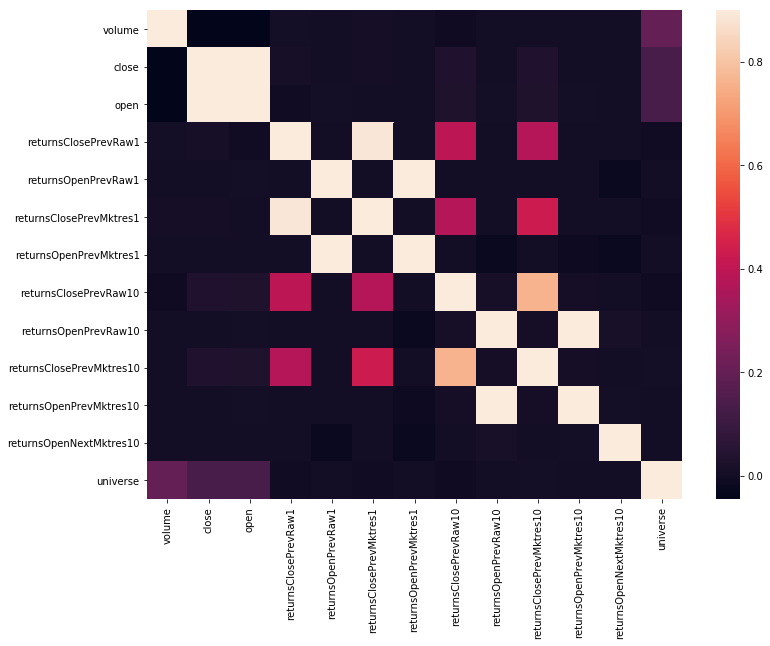

In [44]:
#correlation matrix
corrmat = mkt.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9);

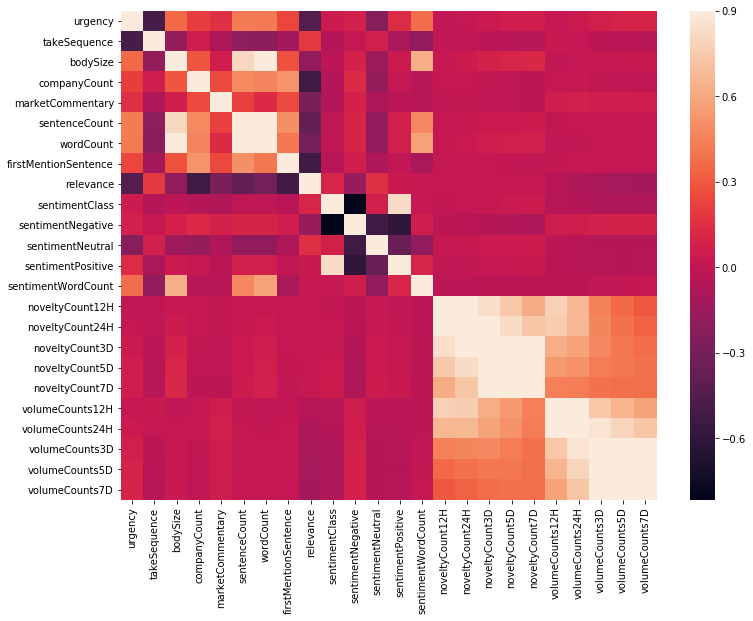

In [45]:
#correlation matrix
corrmat = news.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9);

In [46]:
mkt.columns

Index(['time', 'assetCode', 'assetName', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'universe'],
      dtype='object')

In [47]:
news.columns

Index(['time', 'sourceTimestamp', 'firstCreated', 'sourceId', 'headline',
       'urgency', 'takeSequence', 'provider', 'subjects', 'audiences',
       'bodySize', 'companyCount', 'headlineTag', 'marketCommentary',
       'sentenceCount', 'wordCount', 'assetCodes', 'assetName',
       'firstMentionSentence', 'relevance', 'sentimentClass',
       'sentimentNegative', 'sentimentNeutral', 'sentimentPositive',
       'sentimentWordCount', 'noveltyCount12H', 'noveltyCount24H',
       'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts12H',
       'volumeCounts24H', 'volumeCounts3D', 'volumeCounts5D',
       'volumeCounts7D'],
      dtype='object')

In [48]:
mkt.dtypes

time                        datetime64[ns, UTC]
assetCode                                object
assetName                              category
volume                                  float64
close                                   float64
open                                    float64
returnsClosePrevRaw1                    float64
returnsOpenPrevRaw1                     float64
returnsClosePrevMktres1                 float64
returnsOpenPrevMktres1                  float64
returnsClosePrevRaw10                   float64
returnsOpenPrevRaw10                    float64
returnsClosePrevMktres10                float64
returnsOpenPrevMktres10                 float64
returnsOpenNextMktres10                 float64
universe                                float64
dtype: object

In [49]:
news.dtypes

time                    datetime64[ns, UTC]
sourceTimestamp         datetime64[ns, UTC]
firstCreated            datetime64[ns, UTC]
sourceId                             object
headline                             object
urgency                                int8
takeSequence                          int16
provider                           category
subjects                           category
audiences                          category
bodySize                              int32
companyCount                           int8
headlineTag                          object
marketCommentary                       bool
sentenceCount                         int16
wordCount                             int32
assetCodes                         category
assetName                          category
firstMentionSentence                  int16
relevance                           float32
sentimentClass                         int8
sentimentNegative                   float32
sentimentNeutral                

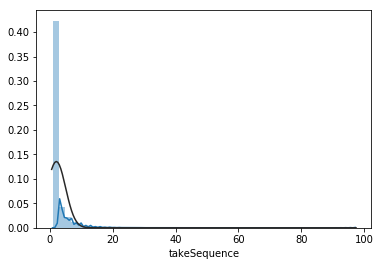

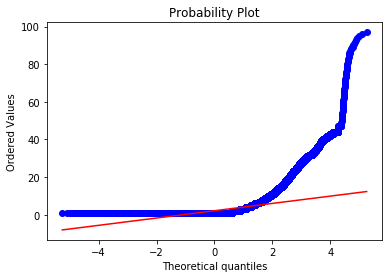

In [50]:
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
##plot of effective_literacy_rate_total
sns.distplot(news['takeSequence'],fit = norm);
fig = plt.figure()
res = stats.probplot(news['takeSequence'], plot=plt)

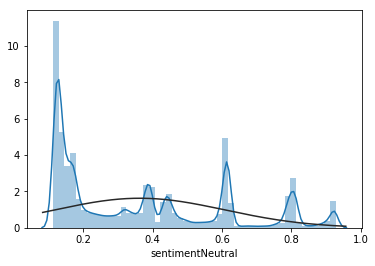

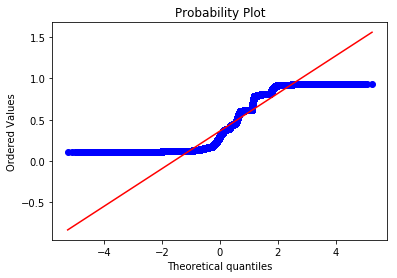

In [53]:
sns.distplot(news['sentimentNeutral'],fit = norm);
fig = plt.figure()
res = stats.probplot(news['sentimentNeutral'], plot=plt)

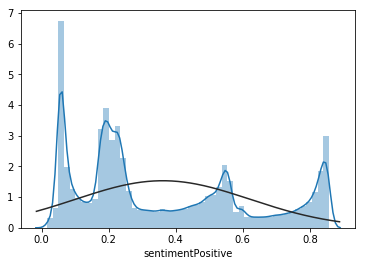

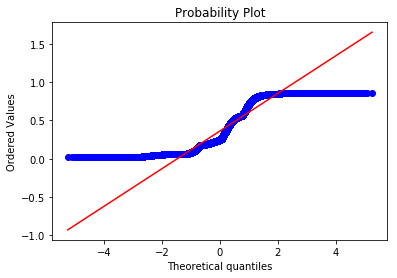

In [54]:
sns.distplot(news['sentimentPositive'],fit = norm);
fig = plt.figure()
res = stats.probplot(news['sentimentPositive'], plot=plt)

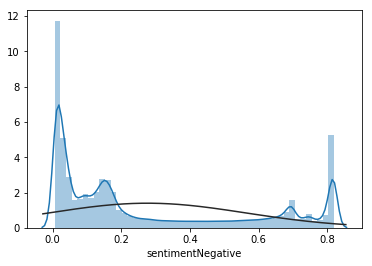

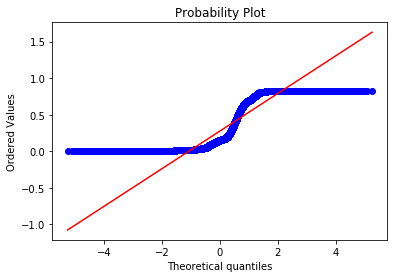

In [55]:
sns.distplot(news['sentimentNegative'],fit = norm);
fig = plt.figure()
res = stats.probplot(news['sentimentNegative'], plot=plt)

In [51]:
null_counts = news.isnull().sum()
null_counts[null_counts > 0].sort_values

<bound method Series.sort_values of Series([], dtype: int64)>

In [52]:
null_counts = mkt.isnull().sum()
null_counts[null_counts > 0].sort_values

<bound method Series.sort_values of returnsClosePrevMktres1     15980
returnsOpenPrevMktres1      15988
returnsClosePrevMktres10    93010
returnsOpenPrevMktres10     93054
dtype: int64>

In [ ]:
plt.scatter(mkt["volume"],mkt.returnsOpenNextMktres10, color='red')
plt.title("Scatter plot between population and number of models")
plt.show()

In [ ]:
corr=mkt.corr()["returnsOpenNextMktres10"]
corr

In [ ]:
###join 2 data frames
pd.merge(mkt,news, on='subject_id')

In [63]:
news.tail(20)

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,bodySize,companyCount,headlineTag,marketCommentary,sentenceCount,wordCount,assetCodes,assetName,firstMentionSentence,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,sentimentWordCount,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
9328730,2016-12-30 21:38:53+00:00,2016-12-30 21:38:53+00:00,2016-12-30 21:38:53+00:00,d502cf0c88be0e07,FACTBOX-U.S. stock market performance in 2016,3,1,RTRS,"{'MINE', 'GASU', 'MKTREP', 'RTRS', 'STX', 'MIN...","{'E', 'PSC', 'NAW', 'U'}",4640,5,FACTBOX,False,8,462,"{'NVDA.OQ', 'NVDA.O'}",NVIDIA Corp,6,0.06742,0,0.017353,0.848793,0.133855,382,0,0,0,0,0,4,4,20,23,23
9328731,2016-12-30 21:38:53+00:00,2016-12-30 21:38:53+00:00,2016-12-30 21:38:53+00:00,d502cf0c88be0e07,FACTBOX-U.S. stock market performance in 2016,3,1,RTRS,"{'MINE', 'GASU', 'MKTREP', 'RTRS', 'STX', 'MIN...","{'E', 'PSC', 'NAW', 'U'}",4640,5,FACTBOX,False,8,462,"{'NEM.DE', 'NEM.N', 'NEM.F'}",Newmont Mining Corp,6,0.06742,0,0.017353,0.848793,0.133855,382,0,0,0,0,0,0,0,5,5,5
9328732,2016-12-30 21:38:53+00:00,2016-12-30 21:38:53+00:00,2016-12-30 21:38:53+00:00,d502cf0c88be0e07,FACTBOX-U.S. stock market performance in 2016,3,1,RTRS,"{'MINE', 'GASU', 'MKTREP', 'RTRS', 'STX', 'MIN...","{'E', 'PSC', 'NAW', 'U'}",4640,5,FACTBOX,False,8,462,{'OKE.N'},ONEOK Inc,6,0.06742,0,0.017353,0.848793,0.133855,382,0,0,0,0,0,2,2,2,2,2
9328733,2016-12-30 21:38:53+00:00,2016-12-30 21:38:53+00:00,2016-12-30 21:38:53+00:00,d502cf0c88be0e07,FACTBOX-U.S. stock market performance in 2016,3,1,RTRS,"{'MINE', 'GASU', 'MKTREP', 'RTRS', 'STX', 'MIN...","{'E', 'PSC', 'NAW', 'U'}",4640,5,FACTBOX,False,8,462,"{'AMAT.OQ', 'AMAT.O'}",Applied Materials Inc,6,0.06742,0,0.017353,0.848793,0.133855,382,0,0,0,0,0,0,1,1,2,2
9328734,2016-12-30 21:38:53+00:00,2016-12-30 21:38:53+00:00,2016-12-30 21:38:53+00:00,d502cf0c88be0e07,FACTBOX-U.S. stock market performance in 2016,3,1,RTRS,"{'MINE', 'GASU', 'MKTREP', 'RTRS', 'STX', 'MIN...","{'E', 'PSC', 'NAW', 'U'}",4640,5,FACTBOX,False,8,462,{'FCX.N'},Freeport-McMoRan Inc,6,0.06742,0,0.017353,0.848793,0.133855,382,0,0,0,0,0,2,3,4,4,4
9328735,2016-12-30 21:39:36+00:00,2016-12-30 21:39:36+00:00,2016-12-30 21:39:36+00:00,b92bbd0fd10725cd,U-Haul Offers 30 Days of Free Self-Storage to ...,3,1,PRN,"{'RORA', 'TRAN', 'RRLF', 'USAGA', 'NEWR', 'BAC...","{'CNR', 'PRN'}",3445,1,,False,23,541,"{'UHAL.O', 'UHAL.OQ'}",Amerco,1,1.00000,1,0.331968,0.171307,0.496725,502,0,0,0,0,0,0,0,1,1,1
9328736,2016-12-30 21:39:43+00:00,2016-12-30 21:39:43+00:00,2016-12-30 21:39:43+00:00,a15741f66a1410bb,EQUITY BANCSHARES INC - SOLD UPTO $25 MLN IN E...,1,1,RTRS,"{'BLR', 'FUND', 'BACT', 'PVE', 'IPO', 'HEDGE',...","{'E', 'U'}",0,1,,False,1,16,"{'EQBK.O', 'EQBK.OQ'}",Equity Bancshares Inc,1,1.00000,0,0.221215,0.594468,0.184318,16,0,0,0,0,0,0,0,0,0,0
9328737,2016-12-30 21:40:14+00:00,2016-12-30 21:40:14+00:00,2016-12-30 21:40:14+00:00,2d0b14bd38e1755d,PARKERVISION -ENTERED MARKET ISSUANCE SALES AG...,1,1,RTRS,"{'BLR', 'TMT', 'TECH', 'US', 'SEMI', 'CHIP', '...","{'E', 'U'}",0,1,,False,1,14,"{'PRKR.OQ', 'PRKR.O'}",ParkerVision Inc,1,1.00000,1,0.030724,0.118268,0.851008,14,0,0,0,0,0,0,0,0,0,0
9328738,2016-12-30 21:40:21+00:00,2016-12-30 21:40:21+00:00,2016-12-30 21:40:21+00:00,c95f5b1bf76862e7,Agrium to present at 2017 AltaCorp Capital Ins...,3,1,MKW,"{'CA', 'AGRC', 'NEWR', 'CHEM', 'COM', 'FERT', ...",{'CCN'},2259,1,,False,12,363,"{'AGU.N', 'AGU.TO'}",Agrium Inc,1,1.00000,1,0.108266,0.382329,0.509406,246,0,0,0,0,0,0,0,0,0,0
9328739,2016-12-30 21:40:21+00:00,2016-12-30 21:40:21+00:00,2016-12-30 21:40:21+00:00,dded614618154ebd,Agrium to present at 2017 AltaCorp Capital Ins...,3,1,MKW,"{'CA', 'AGRC', 'SPEC', 'NEWR', 'FOBE', 'COM', ...","{'CNR', 'MKW'}",2259,1,,False,12,363,"{'AGU.N', 'AGU.TO'}",Agrium Inc,1,1.00000,1,0.108266,0.382329,0.509406,246,0

In [67]:
##unique values
news.headlineTag.nunique()

163

In [68]:
#frequency count
news.headlineTag.value_counts()

                           6341993
BRIEF                       527123
UPDATE 1                    354579
U.S. RESEARCH ROUNDUP       286698
UPDATE 2                    197690
RPT                         143541
BUZZ                        135950
US STOCKS                   121731
MARKET PULSE                104225
UPDATE 3                     99093
US RESEARCH SUMMARY          96236
CORRECTED                    65367
FACTBOX                      58264
PRESS DIGEST                 55344
HEADLINE STOCKS              51365
UPDATE 4                     43647
TEXT                         43307
BREAKINGVIEWS                43098
ANALYSIS                     41933
STOCKS NEWS US               36820
INTERVIEW                    35030
REFILE                       32002
TAKE A LOOK                  29478
CANADA STOCKS                26234
EUROPE RESEARCH ROUNDUP      21521
TABLE                        21285
EXCLUSIVE                    19881
CANADA RESEARCH ROUNDUP      19294
UPDATE 5            